# MNIST Dataset

### import dataset

In [ ]:
import tensorflow as tf

(x_train , y_train ) , (x_test , y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train[:,:,:,None] / 255.
x_test = x_test[:,:,:,None] / 255.

x_train = tf.image.resize(x_train , (32,32))
x_test = tf.image.resize(x_test , (32,32))

x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


TensorShape([60000, 32, 32, 1])

3


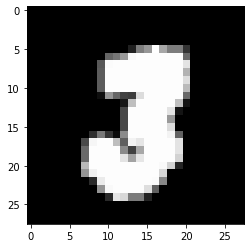

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1201] , cmap='gray')
print(y_train[1201])

# Lenet5 wit MNIST


In [ ]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input((32,32,1))) # (width , height , bitmap) ??
model.add(tf.keras.layers.Conv2D(6 , (5,5) , activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(6 , (5,5) , activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200 , activation='relu')) #original 120
model.add(tf.keras.layers.Dense(200 , activation='relu')) #original 84
model.add(tf.keras.layers.Dense(10 , activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) ,
              loss=tf.keras.losses.sparse_categorical_crossentropy)

In [ ]:
model.fit(x_train , y_train , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1708
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0620
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0459
Epoch 4/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0386
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0316
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0271
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0243
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0206
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0175
Epoch 10/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0167


In [ ]:
import numpy as np

predict_y = model.predict(x_test)

print("accuracy : " + format((np.sum(predict_y.argmax(axis=1) == y_test) / len(y_test) * 100) , ".2f") + " %") 

accuracy : 98.89 %
